In [166]:
# TODO: standardize Y axes per section so the comparison can be visually easier

%matplotlib inline
#import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')

## Preprocessing

In [178]:
#A13OOAT2ORKH6V:3EWIJTFFVPMYW8IUWPUOOQWSVFU0E8,1,1,2937,Bear_4_2,Bear,category2D,pancakes,waffles,False,6032
#participant:assignmentId,trial,blockTrial,trialStartTime,monster,family,category,preferredFood,choice,correct,rt

def stringToInt(arr, position, values):
    for i, v in enumerate(values):
        arr[arr[:,position] == v, position] = i
    return arr

csvFile = 'data/test.csv'
csvFile = 'data/monsters_data_pilot_041417.csv'

# Get all columns
#csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', skip_header=1)
# Only id(0), category(6), correct(9) 
csv = np.genfromtxt(csvFile, dtype=np.string_, delimiter=',', usecols=(0,6,9), skip_header=1)

# Pre-process CSV
# Get categories
categories = [c for c in np.unique(csv[:,1])]
print(categories)
# Get unique ids
ids = [i for i in np.unique(csv[:,0]) ]
# For converting string to int boolean
bo = [b'False', b'True']

csvInt = csv.copy()
# Convert fields to ints for easy processing
for i,j in enumerate([ids, categories, bo]):
    csvInt = stringToInt(csvInt, i, j)
# csvInt = stringToInt(csvInt, 0, ids)
# csvInt = stringToInt(csvInt, 1, categories)
# csvInt = stringToInt(csvInt, 2, [b'False',b'True'])
csvInt = csvInt.astype('int')

# Split by user
splitCsv = [csvInt[csvInt[:,0]==i] for i in np.unique(csvInt[:,0])]

# print(csv)
# print(csvInt)
# print(splitCsv)

[b'category1D', b'category2D', b'categoryIgnore1D', b'categoryRandom']


## Action selection trajectories

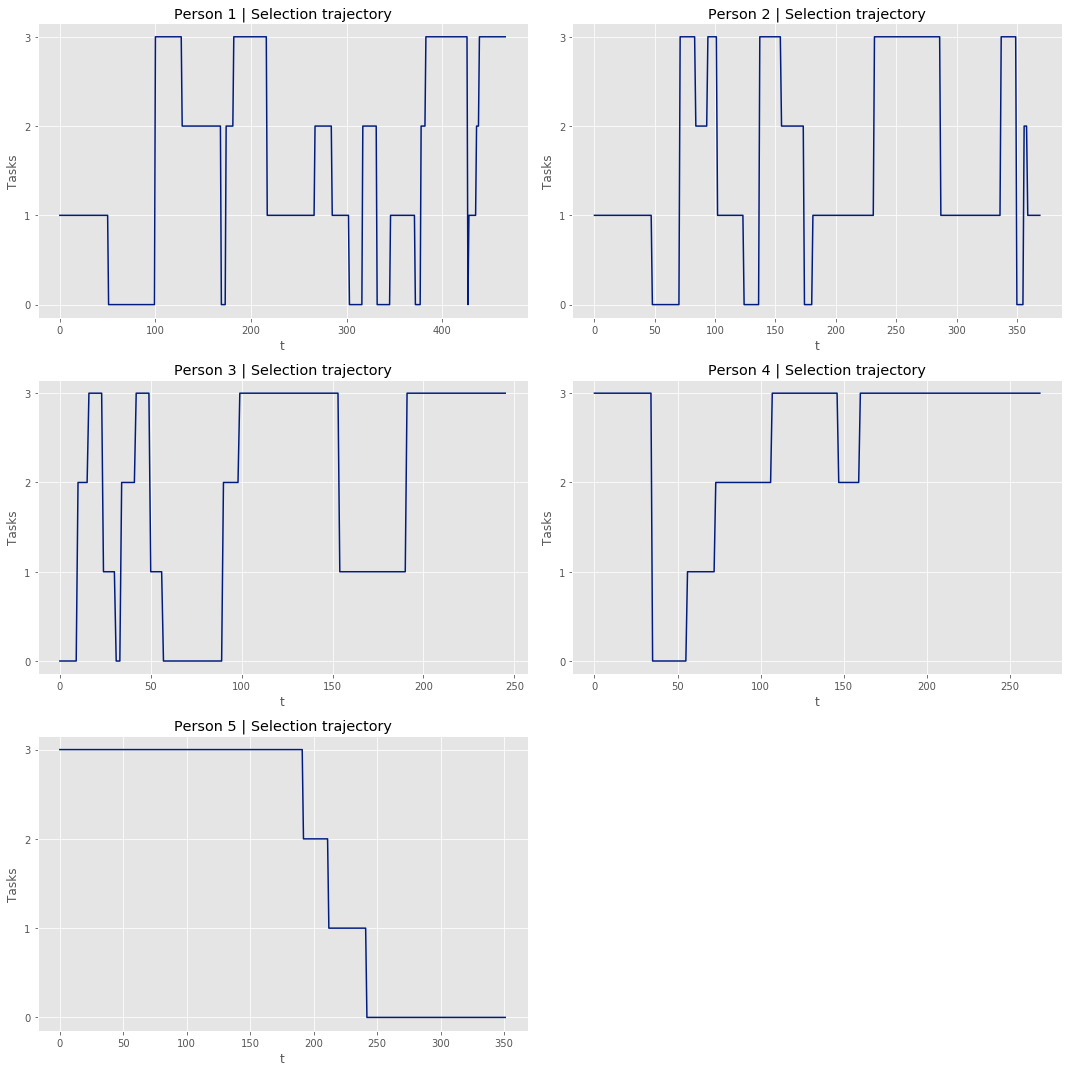

In [199]:
# Do some subplots here for each user
# Selection trajectories in time

# user0 = splitCsv[0]
# plt.plot(user0[:,1])
# plt.show()

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
users = 5

fig = plt.figure(figsize=(15, 15))
# Set up subplots
ax, c = [], 0
for i in range(3):
    for j in range(2):
        ax.append(plt.subplot2grid((3, 2), (i, j)))
        c+=1
        if c == users:
            break
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
for u in range(users):
    ax[u].plot(splitCsv[u][:,1])
    ax[u].set_title(''.join(['Person ', str(u+1), ' | Selection trajectory']))
    ax[u].set_yticks([0,1,2,3])
    ax[u].set_ylabel('Tasks')
    ax[u].set_xlabel('t')

plt.tight_layout()
#plt.savefig('trajectories.pdf')
    
plt.show()

## Cumulative action-selection

Number of occasions a task has been selected at a specific point in time

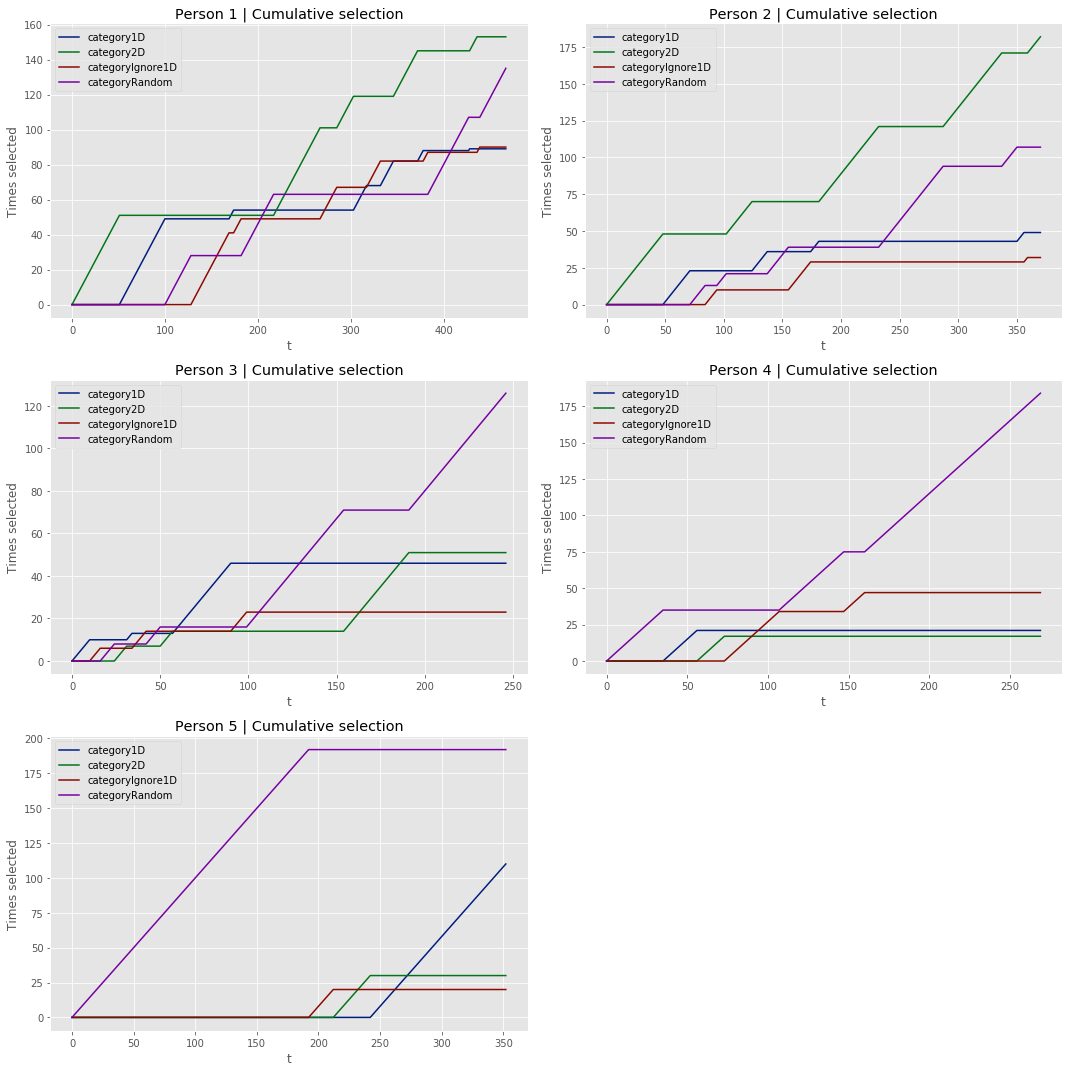

In [190]:
tasks = 4

# Final count to verify my function works
#unique, counts = np.unique(user0[:,1], return_counts=True)
#print(counts)

# Count at each point in time number of occurrences up to that point and save it into a list
# def countInTime(arr, numOfValues):
#     counts = []
#     for i in range(len(arr)+1):
#         count = [(arr[:i] == e).sum() for e in range(numOfValues)]
#         counts.append(count)
#     return np.array(counts).T
        
# cumCounts0 = countInTime(user0[:,1], tasks)
# print(cumCounts0)

# for t in range(tasks):
#     plt.plot(cumCounts0[t,:])
# plt.show()

#=======
categories = ['category1D', 'category2D', 'categoryIgnore1D', 'categoryRandom']

# Count at each point in time number of occurrences up to that point and save it into a list
def countInTime(arr, numOfValues):
    counts = []
    for i in range(len(arr)+1):
        count = [(arr[:i] == e).sum() for e in range(numOfValues)]
        counts.append(count)
    return np.array(counts).T

fig = plt.figure(figsize=(15, 15))
# Set up subplots
ax, c = [], 0
for i in range(3):
    for j in range(2):
        ax.append(plt.subplot2grid((3, 2), (i, j)))
        c+=1
        if c == users:
            break
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
cumCounts = []
for u in range(users):
    # Cumulative count for user u per task
    cumCounts.append( countInTime(splitCsv[u][:,1], tasks) )
    # Plot cumulative counts per task for this user u only
    for t in range(tasks):
        ax[u].plot(cumCounts[u][t,:], label=categories[t])
    ax[u].legend()
    ax[u].set_title(''.join(['Person ', str(u+1), ' | Cumulative selection']))
    ax[u].set_ylabel('Times selected')
    ax[u].set_xlabel('t')

plt.tight_layout()
plt.show()

Not so much learning progress but to surprisal/uncertainty (there is no risk)/entropy/information that could be gained?

## Error (based on accuracy)

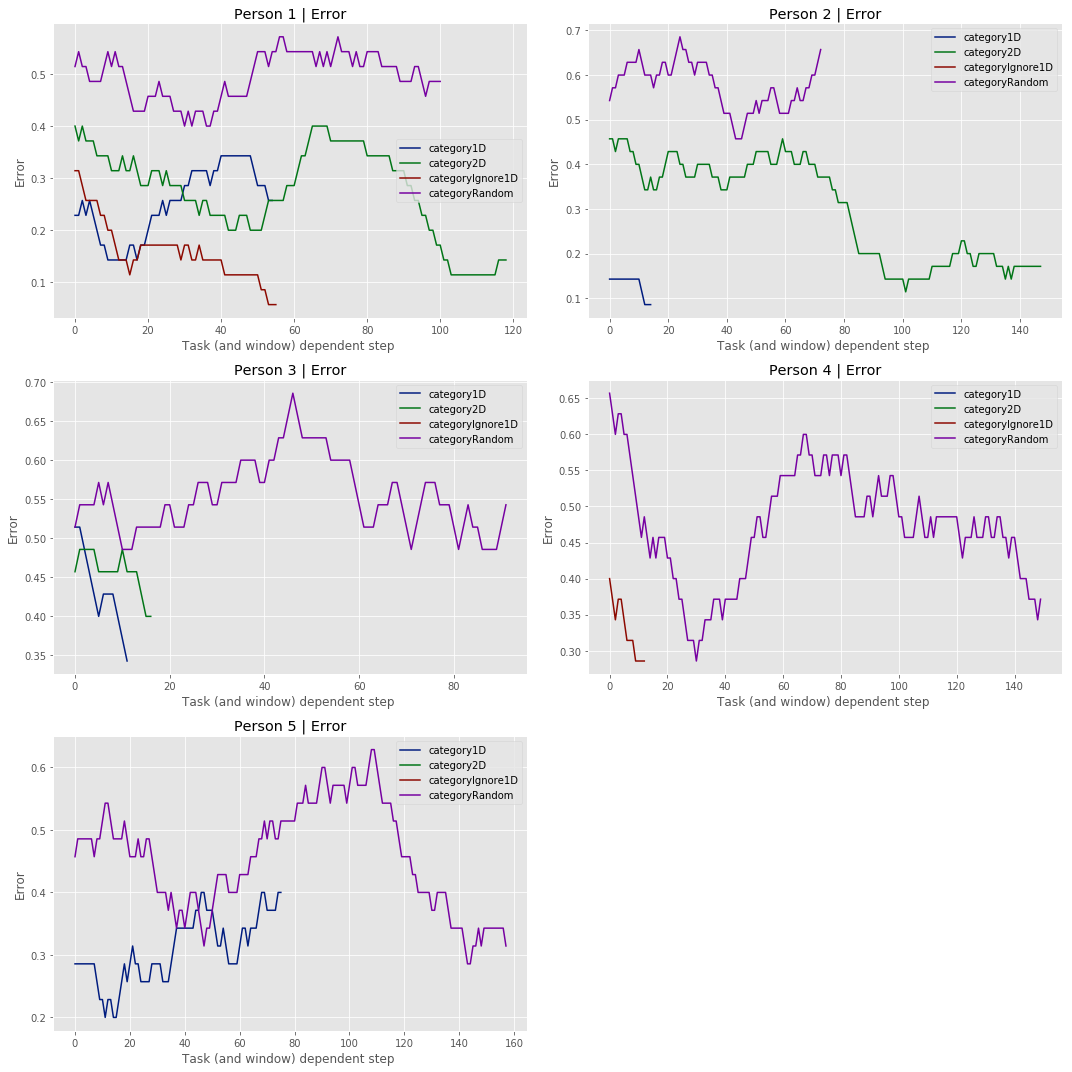

In [205]:
# Error based on Accuracy


#print(csvInt[:,2])
#print("S/F ",user0[:,2])
#print("Tasks ",user0[:,1])

# window = 35
# pd.rolling_mean(csvInt[:,2], window)#[window-1:]
# # Per task
# pd.rolling_mean(user0[user0[:,1]==1, 2], window)#[window-1:]

# movAvg = []
# for t in range(tasks):
#     # e = 1-accuracy
#     movAvg.append(1-pd.rolling_mean(user0[user0[:,1]==t, 2], window)[window-1:])
#     #print("t ", user0[user0[:,1]==t, 2])
#     #print("t ", 1-pd.rolling_mean(user0[user0[:,1]==t, 2], 1)[1-1:])
#     #print("t ", 1-pd.rolling_mean(user0[user0[:,1]==t, 2], window)[window-1:])
#     plt.plot(movAvg[t])
# plt.show()

#========

# Controls moving average window (So window=1 means average with nothing else but itself)
window = 35

fig = plt.figure(figsize=(15, 15))
# Set up subplots
ax, c = [], 0
for i in range(3):
    for j in range(2):
        ax.append(plt.subplot2grid((3, 2), (i, j)))
        c+=1
        if c == users:
            break
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
errors=[]
for u in range(users):
    # With a list in case I want to store them like cumCounts, movAvg should be moved out of this loop though
    # To be indexed by user too
    movAvg=[]
    # Plot error moving average per task for this user u only
    for t in range(tasks):
        # e = 1-accuracy (where accuracy)
        movAvg.append(1-pd.rolling_mean(splitCsv[u][splitCsv[u][:,1]==t, 2], window)[window-1:])
        ax[u].plot(movAvg[t], label=categories[t])
    errors.append(movAvg)
    ax[u].legend()
    ax[u].set_title(''.join(['Person ', str(u+1), ' | Error']))
    ax[u].set_ylabel('Error')
    ax[u].set_xlabel('Task (and window) dependent step ')

plt.tight_layout()
plt.show()


## Learning Progress (n-back step smoothing version)

It is calculated on the smoothed out error time series from the previous section. Thus parameter window indirectly tunes it too.

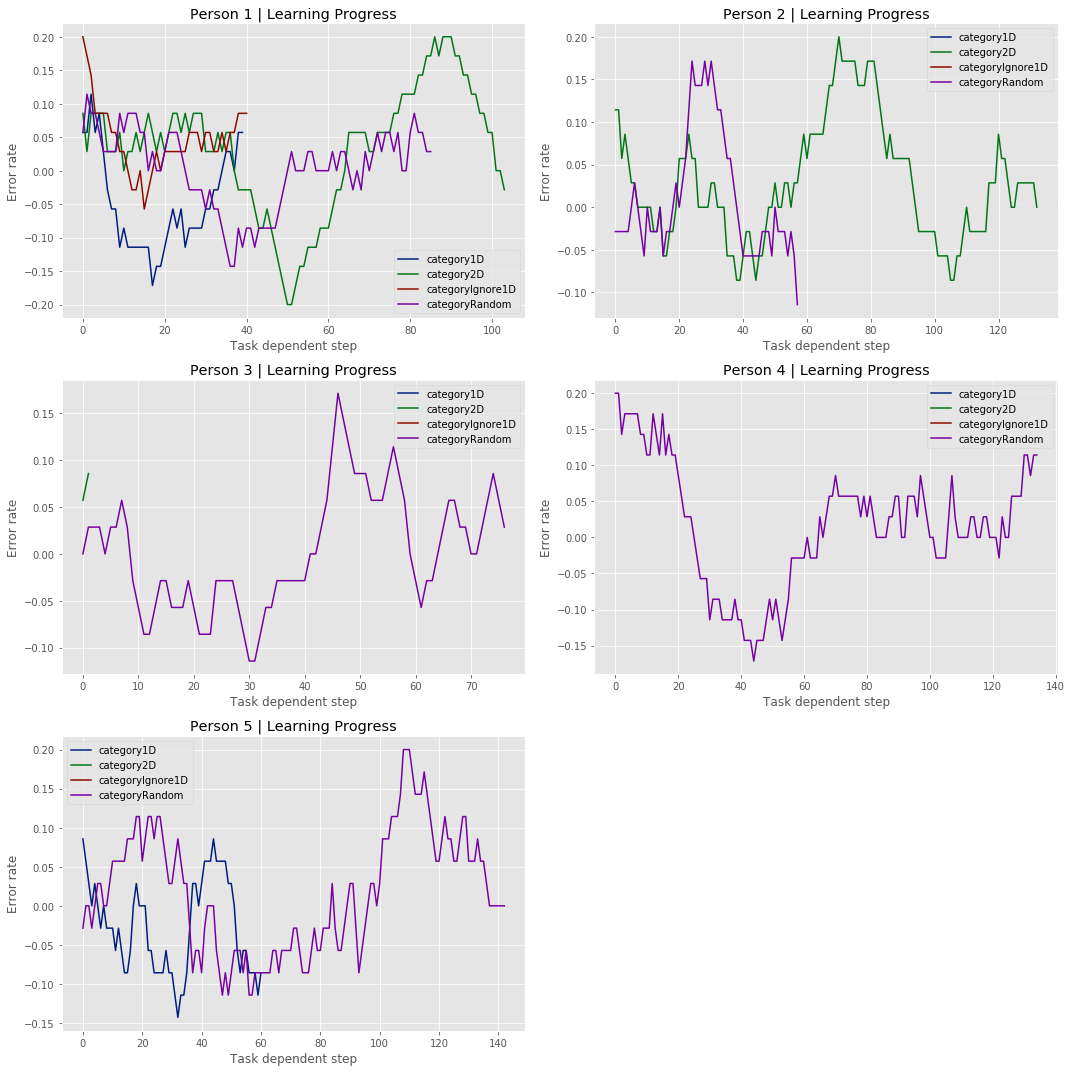

In [224]:
#try here with lookahead 1 to test 

#out[t] = a[t+1] - a[t]
#I need a lookahead (PROBABLY WOULD BE BETTER A LOOKBACK SO INVERSE THE LOOP)
#out[t] = a[t] - a[t-lookback]

   

# #task 2
# ta = 0
# lpT = errorChange(movAvg[ta], window=lookback, getInitDiff=False)
# # TODO: adjust so it start at 0 when getInitDiff=true
# #plt.plot([x for x in range(lookback,lookback+len(lpT))], lpT)
# #plt.plot(lpT)
# #plt.plot(movAvg[ta])
# #plt.show()

# #===

# lpT = errorChange(errors[4][ta], window=lookback, getInitDiff=False)
# # TODO: adjust so it start at 0 when getInitDiff=true
# #plt.plot([x for x in range(lookback,lookback+len(lpT))], lpT)
# plt.plot(lpT)
# #plt.plot(movAvg[ta])
# plt.show()



#lp[t] = - [ err[t] - err[t-lookback] ]
lookback = 15

def errorChange(arr, window=1, getInitDiff=True):
    # Reverse it
    arr = arr[::-1]
    # LP = - [error(now) - error(past)]
    # window: a look-back to consider the difference  diff[t] = a[t] - a[t-window]
    lp = [-i+j for i, j in zip(arr[:-window], arr[window:])]
    # if it's set to true then it will append the initial (noisy) differences that were left behind by the nature
    # of having a rolling window. Thus it will calculate the differences (only one step) and append them
    if getInitDiff:
        lp += np.diff(arr[-window:]).tolist()
    # Reverse it
    lp = lp[::-1]
    return lp



fig = plt.figure(figsize=(15, 15))
# Set up subplots
ax, c = [], 0
for i in range(3):
    for j in range(2):
        ax.append(plt.subplot2grid((3, 2), (i, j)))
        c+=1
        if c == users:
            break
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for u in range(users):
    lpT = []
    for t in range(tasks):
        lpT.append( errorChange(errors[u][t], window=lookback, getInitDiff=False) )
        # If i make errorChange multidimensional
        #ax[u].plot(lpT[u][t], label=categories[t])
        ax[u].plot(lpT[t], label=categories[t])
        # TODO: adjust so it start at 0 when getInitDiff=true
        #ax[u].plot([x for x in range(lookback,lookback+len(lpT))], lpT)
    ax[u].legend()
    ax[u].set_title(''.join(['Person ', str(u+1), ' | Learning Progress']))
    ax[u].set_ylabel('Error rate')
    ax[u].set_xlabel('Task dependent step')
    
    ax[u].axhline(y=0,xmin=0,xmax=1,c="black",linewidth=0.5,zorder=0)

plt.tight_layout()
plt.show()

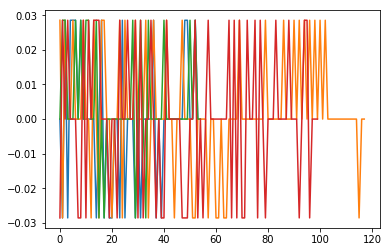

In [70]:
#out[t] = a[t+1] - a[t]
#I need a lookahead
#out[t] = a[t+ahead] - a[t]

lookAhead = 1

lp = []
for t in range(tasks):
    # LP = - [e(t+1+ahead) - e(t)]
    lp.append(-np.diff(movAvg[t]))
    plt.plot(lp[t])
plt.show()

[ 0.31428571  0.31428571  0.28571429  0.25714286  0.25714286  0.25714286
  0.25714286  0.22857143  0.22857143  0.2         0.2         0.17142857
  0.14285714  0.14285714  0.14285714  0.11428571  0.14285714  0.14285714
  0.17142857  0.17142857  0.17142857  0.17142857  0.17142857  0.17142857
  0.17142857  0.17142857  0.17142857  0.17142857  0.17142857  0.14285714
  0.17142857  0.17142857  0.14285714  0.14285714  0.17142857  0.14285714
  0.14285714  0.14285714  0.14285714  0.14285714  0.14285714  0.11428571
  0.11428571  0.11428571  0.11428571  0.11428571  0.11428571  0.11428571
  0.11428571  0.11428571  0.11428571  0.08571429  0.08571429  0.05714286
  0.05714286  0.05714286]
[ 0.05714286  0.05714286  0.05714286  0.08571429  0.08571429  0.11428571
  0.11428571  0.11428571  0.11428571  0.11428571  0.11428571  0.11428571
  0.11428571  0.11428571  0.11428571  0.14285714  0.14285714  0.14285714
  0.14285714  0.14285714  0.14285714  0.17142857  0.14285714  0.14285714
  0.17142857  0.17142857 

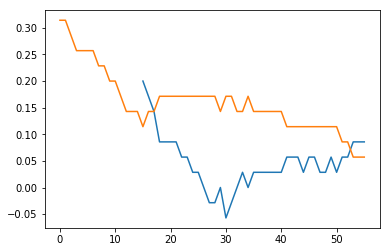

In [111]:
#try here with lookahead 1 to test 

#out[t] = a[t+1] - a[t]
#I need a lookahead (PROBABLY WOULD BE BETTER A LOOKBACK SO INVERSE THE LOOP)
#out[t] = a[t] - a[t-lookback]

lookback = 15

def errorChange(arr, window=1, getInitDiff=True):
    # Reverse it
    arr = arr[::-1]
    # LP = - [error(now) - error(past)]
    # window: a look-back to consider the difference  diff[t] = a[t] - a[t-window]
    lp = [-i+j for i, j in zip(arr[:-window], arr[window:])]
    # if it's set to true then it will append the initial (noisy) differences that were left behind by the nature
    # of having a rolling window. Thus it will calculate the differences (only one step) and append them
    if getInitDiff:
        lp += np.diff(arr[-window:]).tolist()
    # Reverse it
    lp = lp[::-1]
    return lp
    

#task 2
ta =2
rev = movAvg[ta][::-1]
print(movAvg[ta])
print(rev)

lpT = errorChange(movAvg[ta], window=lookback, getInitDiff=False)
plt.plot([x for x in range(lookback,lookback+len(lpT))], lpT)
plt.plot(movAvg[ta])
plt.show()


#TEST diffs
# t = [1, 3, 6, 2, 13, 5, 7, 0, 2]
# print(t)
# print(t[:-lookback])
# print(t[lookback:])
# bur = [-i+j for i, j in zip(t[:-lookback], t[lookback:])]
# print(bur)
# print(t[-lookback:])
# #bur.append(np.diff(t[-lookback:]).tolist())
# bur = bur + np.diff(t[-lookback:]).tolist()
# print(bur)
# print(errorChange(t,window=lookback))


# lp = []
# for t in range(tasks):
#     # LP = - [e(t+1+ahead) - e(t)]
#     lp.append(-np.diff(movAvg[t]))
#     plt.plot(lp[t])
# plt.show()

In [ ]:

#TODO AT THE END beautify the plots, seaborn and interactiveness